In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
trnImages = np.load('trnImage.npy')
trnLabelF = np.load('trnLabel_fine.npy')
trnLabelC = np.load('trnlabel_coarse.npy')
tstImage = np.load('tstImage.npy')
tstLabelF = np.load('tstLabel_fine.npy')
tstLabelC = np.load('tstLabel_coarse.npy')

#print(tstImage[:1])
#tstImage = tstImage.reshape(10000, 32,32,3)
tstImage.shape



(32, 32, 3, 10000)

Image is 4D

- 1st is Height
- 2nd is Width
- 3rd is RGB
- 4th is samples

Example of loading some images

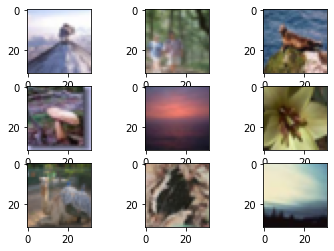

In [17]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(tstImage[:,:,:,i])


plt.show()

In [18]:
trnImages = trnImages/255
trnLabelF = trnLabelF/255
trnLabelC = trnLabelC/255
tstImage = tstImage/255
tstLabelC = tstLabelC/255
tstLabelF = tstLabelF/255

trnLabelF.shape
trnImages = np.transpose(trnImages, [3, 0, 1, 2])
print(trnImages.shape)
tstImage = np.transpose(tstImage, [3, 0, 1, 2])

(50000, 32, 32, 3)


In [19]:
model = keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
print(model.output_shape)
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
print(model.output_shape)
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
print(model.output_shape)
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
print(model.output_shape)
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
print(model.output_shape)

model.add(tf.keras.layers.Flatten())
print(model.output_shape)
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
print(model.output.shape)

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

(None, 32, 32, 32)
(None, 16, 16, 32)
(None, 8, 8, 64)
(None, 8, 8, 128)
(None, 4, 4, 128)
(None, 2048)
(None, 10)


In [20]:
history = model.fit(trnImages, trnLabelF, epochs=10, validation_data=(tstImage, tstLabelF), verbose = 1)

Epoch 1/10
  97/1563 [>.............................] - ETA: 1:44 - loss: 0.5180 - sparse_categorical_accuracy: 0.0081

KeyboardInterrupt: 